## Chain using LangGraph

In [1]:
from dotenv import load_dotenv
import os
load_dotenv("./.env")

os.environ['GROQ_API_KEY'] = os.getenv("GROQ_API_KEY")

In [8]:
from langchain_core.messages import AIMessage, HumanMessage
from pprint import pprint

messages = [AIMessage(content=f"Please tell how can I help", name="LLMModel")]
messages.append(HumanMessage(content=f"I want to learn coding", name="Cris"))
messages.append(AIMessage(content=f"Please tell which programming language you want to know", name="LLMModel"))
messages.append(HumanMessage(content=f"I want to learn C++ language", name="LLMModel"))

for message in messages:
    message.pretty_print()

================================== Ai Message ==================================
Name: LLMModel

Please tell how can I help
================================ Human Message =================================
Name: Cris

I want to learn coding
================================== Ai Message ==================================
Name: LLMModel

Please tell which programming language you want to know
================================ Human Message =================================
Name: LLMModel

I want to learn C++ language


In [2]:
from langchain_groq import ChatGroq

llm = ChatGroq(model="openai/gpt-oss-20b")

In [7]:
response = llm.invoke(messages)
response.content

'### 🚀 Quick‑Start Roadmap for Learning C++ (2025)\n\n| Stage | What you’ll learn | Why it matters | Suggested resources | Practice ideas |\n|-------|-------------------|----------------|---------------------|----------------|\n| **1️⃣ Setup & Basics** | Install a compiler, IDE, and write “Hello, World!” | You need a working environment and the syntax of C++ fundamentals. | • **IDE**: Visual Studio Code (VS\u202fCode) + C/C++ extension<br>• **Compiler**: GCC (Linux/macOS) or MSVC (Windows)<br>• **Tutorial**: “C++ Primer” – Chapters 1‑3 or the free **cppreference.com** “Getting Started” guide | Write a program that prints your name, age, and a short message. |\n| **2️⃣ Core Language Features** | Variables, data types, operators, control flow, functions, arrays, pointers, references | These are the building blocks of every C++ program. | • **Book**: *C++ Primer* (Chapters 4‑8)<br>• **Online**: **LearnCpp.com** (chapters 4‑12)<br>• **Video**: “C++ Programming Basics” (YouTube – freeCodeCa

In [8]:
print(response.content)

### 🚀 Quick‑Start Roadmap for Learning C++ (2025)

| Stage | What you’ll learn | Why it matters | Suggested resources | Practice ideas |
|-------|-------------------|----------------|---------------------|----------------|
| **1️⃣ Setup & Basics** | Install a compiler, IDE, and write “Hello, World!” | You need a working environment and the syntax of C++ fundamentals. | • **IDE**: Visual Studio Code (VS Code) + C/C++ extension<br>• **Compiler**: GCC (Linux/macOS) or MSVC (Windows)<br>• **Tutorial**: “C++ Primer” – Chapters 1‑3 or the free **cppreference.com** “Getting Started” guide | Write a program that prints your name, age, and a short message. |
| **2️⃣ Core Language Features** | Variables, data types, operators, control flow, functions, arrays, pointers, references | These are the building blocks of every C++ program. | • **Book**: *C++ Primer* (Chapters 4‑8)<br>• **Online**: **LearnCpp.com** (chapters 4‑12)<br>• **Video**: “C++ Programming Basics” (YouTube – freeCodeCamp) | Creat

## Tools

In [5]:
def add(a:int,b:int)->int:
    """Add a and b
    Args:
        a(int): first int
        b(int): second int
    
    Returns:
        int
    """
    return a+b

In [3]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000002A8C6A956A0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000002A8C6A963C0>, model_name='openai/gpt-oss-20b', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [6]:
## Binding tools with llm

llm_with_tools = llm.bind_tools([add])

In [10]:
tool_call = llm_with_tools.invoke([HumanMessage(content=f"What is 2+2", name="Cris")])

In [11]:
tool_call.tool_calls

[{'name': 'add',
  'args': {'a': 2, 'b': 2},
  'id': 'fc_72eaf76c-bc56-48b4-b8c3-e6753959fc4a',
  'type': 'tool_call'}]

In [12]:
### Use messages as state
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage

class State(TypedDict):
    message:list[AnyMessage]

In [37]:
from langgraph.graph.message import add_messages
from typing import Annotated

class State(TypedDict):
    messages:Annotated[list[AnyMessage], add_messages]

In [38]:
### Reducer with add_message

initial_messages = [AIMessage(content=f"Please tell how can I help", name="LLMModel")]
initial_messages.append(HumanMessage(content=f"I want to learn coding", name="Cris"))
initial_messages

[AIMessage(content='Please tell how can I help', additional_kwargs={}, response_metadata={}, name='LLMModel'),
 HumanMessage(content='I want to learn coding', additional_kwargs={}, response_metadata={}, name='Cris')]

In [39]:
ai_message = AIMessage(content=f"Please tell which programming language you want to know", name="LLMModel")

In [40]:
add_messages(initial_messages, ai_message)

[AIMessage(content='Please tell how can I help', additional_kwargs={}, response_metadata={}, name='LLMModel', id='6681197d-f377-4ac9-b629-d53ca23be1f4'),
 HumanMessage(content='I want to learn coding', additional_kwargs={}, response_metadata={}, name='Cris', id='326b041f-b260-4032-82d5-4a8520ec3497'),
 AIMessage(content='Please tell which programming language you want to know', additional_kwargs={}, response_metadata={}, name='LLMModel', id='61118e25-3894-496d-bcf0-ecc7da0a4dc7')]

In [41]:
# Chatbot node functionality
def llm_tool(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

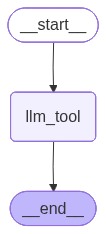

In [47]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

builder = StateGraph(State)

builder.add_node("llm_tool", llm_tool)

builder.add_edge(START, "llm_tool")
builder.add_edge("llm_tool", END)

graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [48]:
## invoke

messages = graph.invoke({"messages":"What is 2 plus 2"})

for message in messages['messages']:
    message.pretty_print()

================================ Human Message =================================

What is 2 plus 2
================================== Ai Message ==================================
Tool Calls:
  add (fc_3c945a40-4c13-4d60-b48f-a82ec8687090)
 Call ID: fc_3c945a40-4c13-4d60-b48f-a82ec8687090
  Args:
    a: 2
    b: 2


In [44]:
tools = [add]

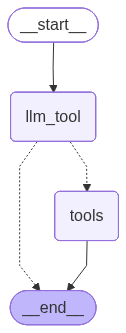

In [52]:
# Add tool node
from langgraph.prebuilt import ToolNode, tools_condition

builder = StateGraph(State)

builder.add_node("llm_tool", llm_tool)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "llm_tool")
builder.add_conditional_edges(
    "llm_tool",
    tools_condition
)
builder.add_edge("llm_tool", END)

graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [53]:
## invoke

messages = graph.invoke({"messages":"What is 2 plus 2"})

for message in messages['messages']:
    message.pretty_print()

================================ Human Message =================================

What is 2 plus 2
================================== Ai Message ==================================
Tool Calls:
  add (fc_14658868-0b82-47f3-98e6-5599167c6325)
 Call ID: fc_14658868-0b82-47f3-98e6-5599167c6325
  Args:
    a: 2
    b: 2
================================= Tool Message =================================
Name: add

4


In [54]:
## invoke

messages = graph.invoke({"messages":"What's machine learning"})

for message in messages['messages']:
    message.pretty_print()

================================ Human Message =================================

What's machine learning
================================== Ai Message ==================================

**Machine learning (ML)** is a branch of computer science that focuses on building systems that can learn from data, improve over time, and make decisions or predictions without being explicitly programmed for each specific task.

---

### Core Ideas

| Concept | What it means | Example |
|---------|---------------|---------|
| **Learning** | The system extracts patterns or rules from data. | A spam filter learns which words are common in spam emails. |
| **Model** | A mathematical representation of those patterns. | A neural network that maps input features to an output label. |
| **Training** | The process of adjusting the model using labeled or unlabeled data. | Feeding thousands of labeled images to a convolutional neural network. |
| **Inference / Prediction** | Using the trained model to make pr